In [2]:
import sys
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit/data_preprocessing_code')
sys.path.append('/Users/shayneufeld/GitHub/mouse_bandit')
import support_functions as sf
import numpy as np
import pandas as pd
import scipy as sp
import bandit_preprocessing as bp
import sys
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [3]:
record = pd.read_csv('/Users/shayneufeld/GitHub/mouse_bandit/session_record.csv',index_col=0)

In [4]:
record.shape

(674, 16)

## Extract sessions

In [5]:
K7 = record[((record['Mouse ID']=='K7') & (record['p(high Port)'] > 0))].copy()
K9 = record[((record['Mouse ID']=='K9') & (record['p(high Port)'] > 0))].copy()
K13 = record[((record['Mouse ID']=='K13') & (record['p(high Port)'] > 0))].copy()

q43_ = record[((record['Mouse ID']=='q43') & (record['p(high Port)'] > 0))].copy()
q45_ = record[((record['Mouse ID']=='q45') & (record['p(high Port)'] > 0))].copy()
K1_ = record[((record['Mouse ID']=='K1') & (record['p(high Port)'] > 0))].copy()
K1 = K1_.loc[543:].copy()
q43 = q43_.loc[623:].copy()
q45 = q45_.loc[644:].copy()

mice = [K7,K9,K13,K1,q43,q45]

(0.5, 1.0)

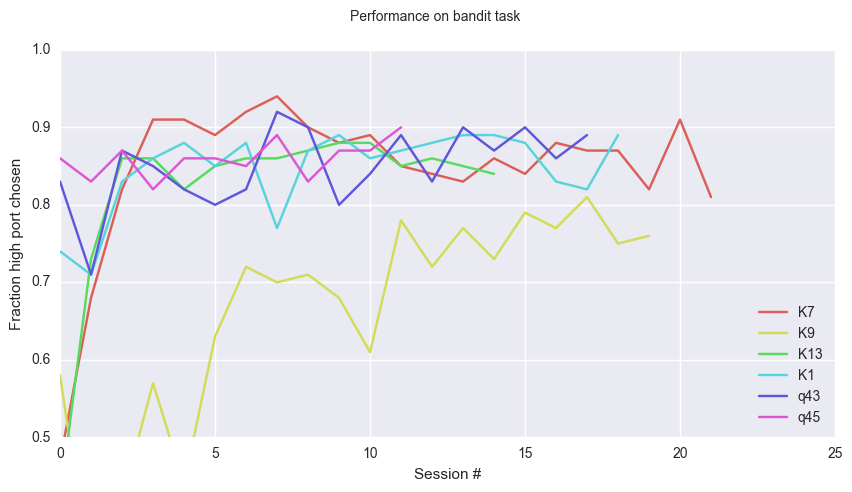

In [8]:
colorz = sns.color_palette('hls',n_colors=6)
fig = plt.figure(figsize=(10,5))
plt.suptitle('Performance on bandit task')

for i,mouse in enumerate(mice):
    
    plt.plot(range(mouse.shape[0]),mouse['p(high Port)'].values,color=colorz[i],label=mouse['Mouse ID'].values[0])
    
    switch_90 = np.where(((mouse['Left Reward Prob'] == 0.1) | (mouse['Left Reward Prob'] == 0.9)))[0][0]
    
    #plt.vlines(x=switch_90,ymin=0,ymax=1,linestyles='dotted',colors=colorz[i])
    
plt.legend(loc='lower right')
plt.xlabel('Session #')
plt.ylabel('Fraction high port chosen')
plt.ylim(0.5,1.0)